### TASK 3:

# Portuguese Bank Marketing

#### Problem statement:
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

<b>Dateset</b> :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### The classification goal: 
To predict if the client will subscribe a term deposit (variable y).


---

Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


Reading the csv file:

In [2]:
data=pd.read_csv(r"C:\Users\Nidhi\OneDrive\Desktop\prodigy infotech\task 3\bank+marketing\bank\bank.csv",delimiter=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.rename(columns={'y':'term deposit'},inplace=True)

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term deposit
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


Checking shape of the dataset:

In [7]:
print("rows,columns:",data.shape)

rows,columns: (4521, 17)


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term deposit'],
      dtype='object')

In [9]:
data.nunique()

age               67
job               12
marital            3
education          4
default            2
balance         2353
housing            2
loan               2
contact            3
day               31
month             12
duration         875
campaign          32
pdays            292
previous          24
poutcome           4
term deposit       2
dtype: int64

Checking missing values:

In [10]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term deposit    0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term deposit
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [13]:
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
term deposit    object
dtype: object

In [14]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Categorical Columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'term deposit'],
      dtype='object')


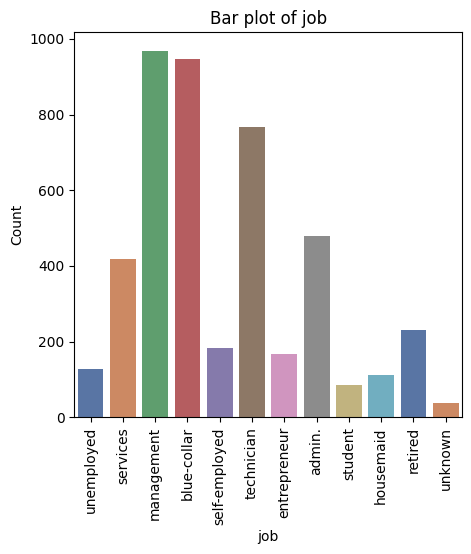

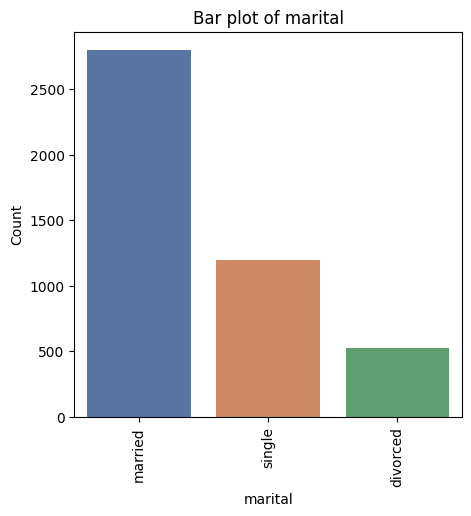

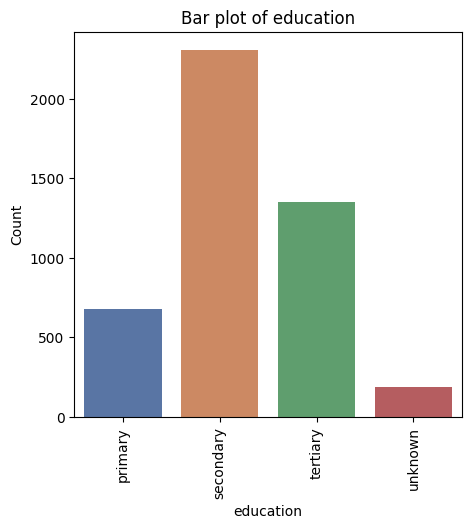

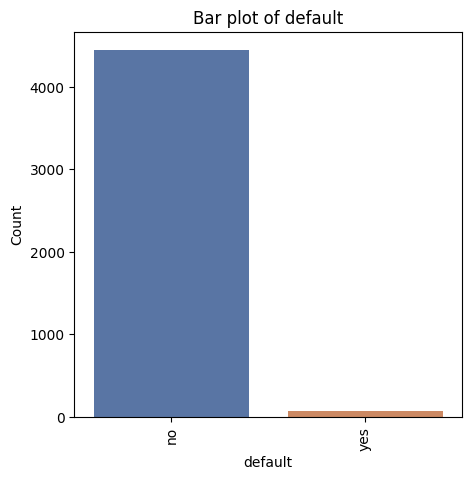

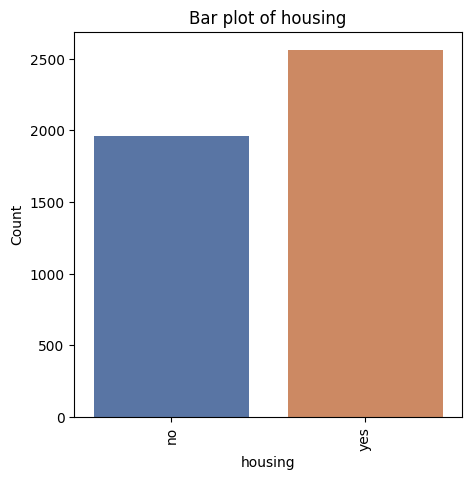

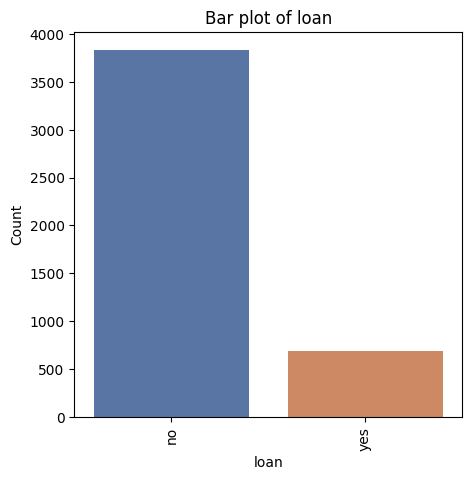

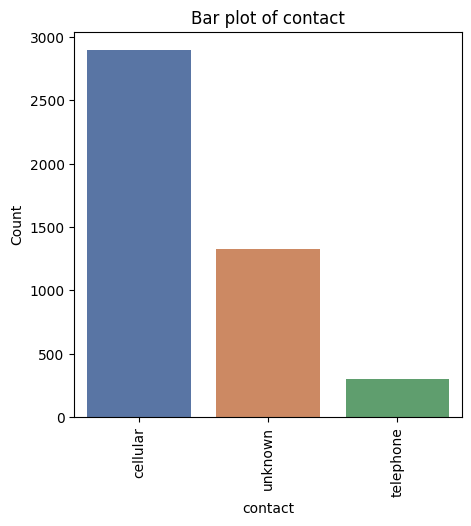

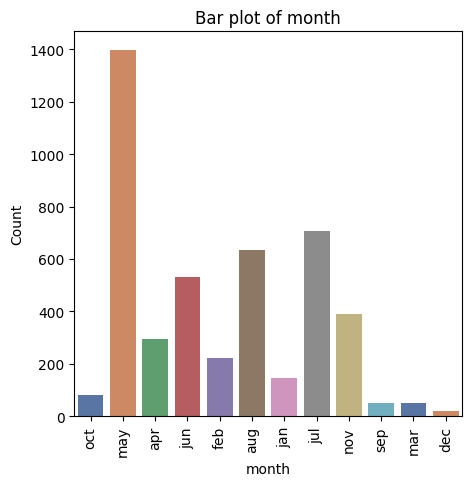

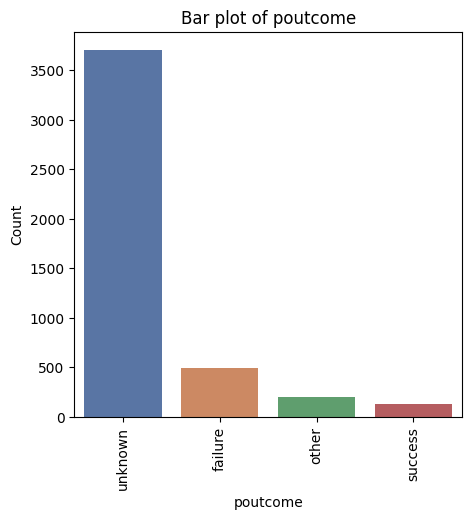

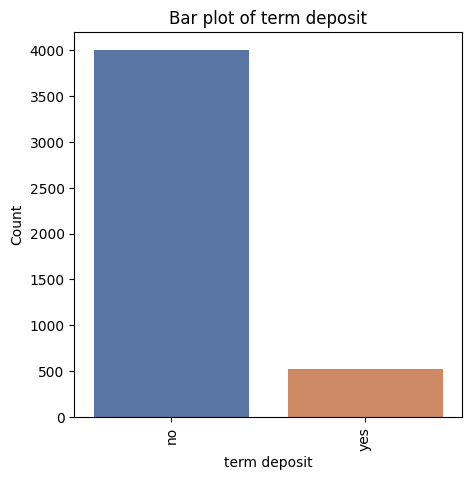

In [15]:
# Assuming you have a DataFrame called 'data' and you want to extract categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Now you can proceed with your loop
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=data, palette='deep')
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


Converting Categorical into Numerical data:

In [16]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'term deposit']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    # Ensure column has no missing values
    if data[column].isnull().sum() == 0:
        data[column] = label_encoder.fit_transform(data[column])

# Display the updated DataFrame
print(data.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  term deposit  
0   19     10        79         1     -1         0         3             0  
1   11      8       220         1    339         4         0             0  
2   16      0       185         1    330         1         0             0  
3    3      6       199         4     -1         0         3             0  
4    5      8       226         1     -1         0         3             0  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8662983425414365

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       807
           1       0.40      0.46      0.43        98

    accuracy                           0.87       905
   macro avg       0.67      0.69      0.68       905
weighted avg       0.88      0.87      0.87       905


Confusion Matrix:
[[739  68]
 [ 53  45]]


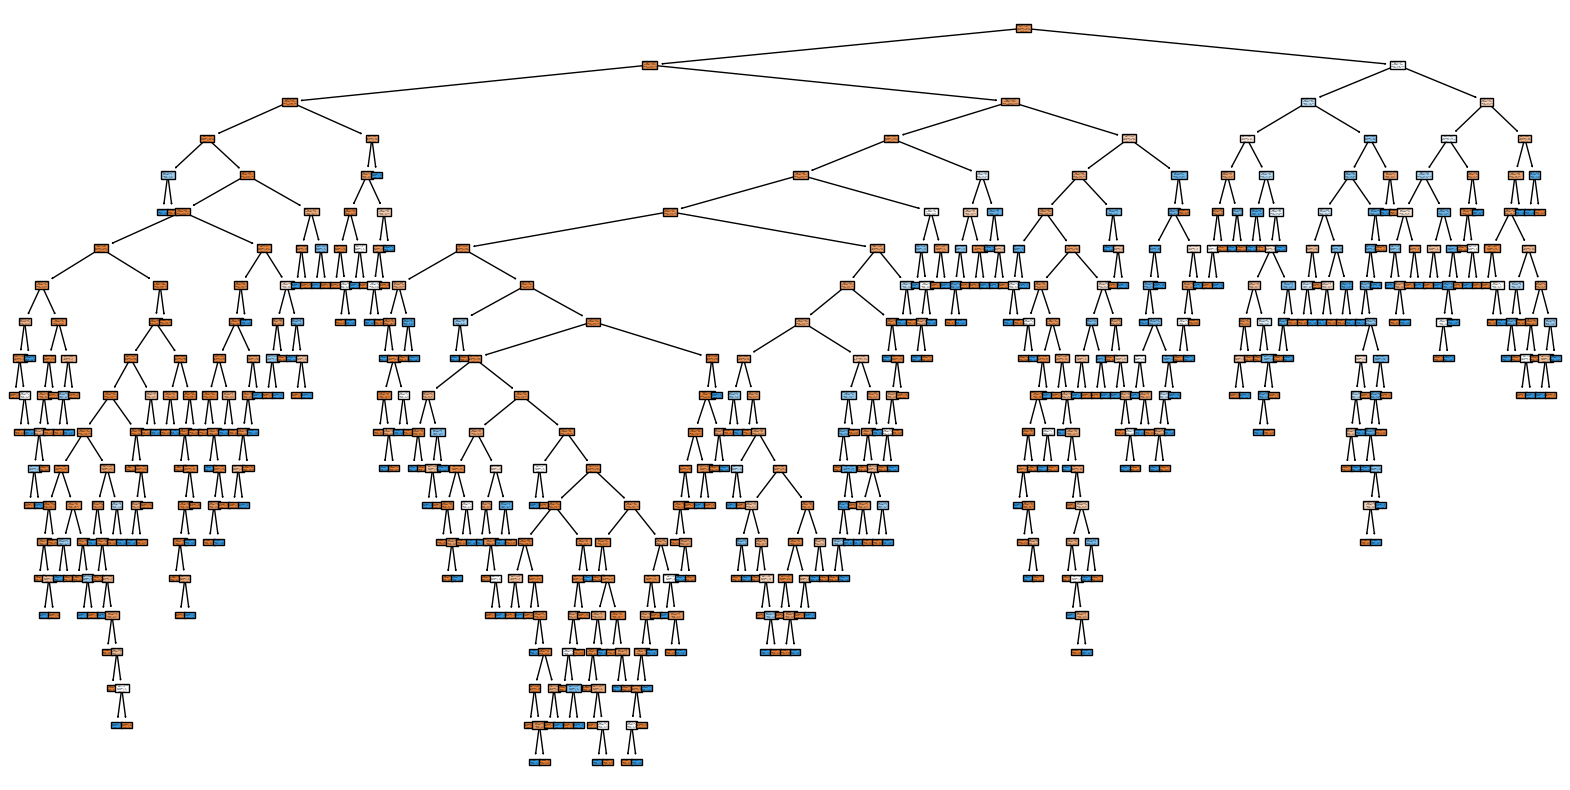

In [23]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


In [31]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [33]:
#hyper parameters
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [34]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [35]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7900552486187845
Precision -  0.0660377358490566
For  KN
Accuracy -  0.8773480662983425
Precision -  0.39344262295081966
For  DT
Accuracy -  0.8994475138121547
Precision -  0.559322033898305
For  LR
Accuracy -  0.8928176795580111
Precision -  0.5151515151515151
For  RF
Accuracy -  0.8972375690607735
Precision -  0.5510204081632653
For  AdaBoost
Accuracy -  0.8994475138121547
Precision -  0.5538461538461539
For  BgC
Accuracy -  0.9005524861878453
Precision -  0.5606060606060606
For  ETC
Accuracy -  0.8950276243093923
Precision -  0.5405405405405406
For  GBDT
Accuracy -  0.8939226519337017
Precision -  0.5217391304347826



<b>here,we can observe that bagging classifier is providing us with better accuracy 90.05% and precision 56.06%.</b>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [49]:
# Define the Bagging Classifier
bgc_clf = BaggingClassifier(clf, n_estimators=50, random_state=2)

# Train the Bagging Classifier
bgc_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=2)

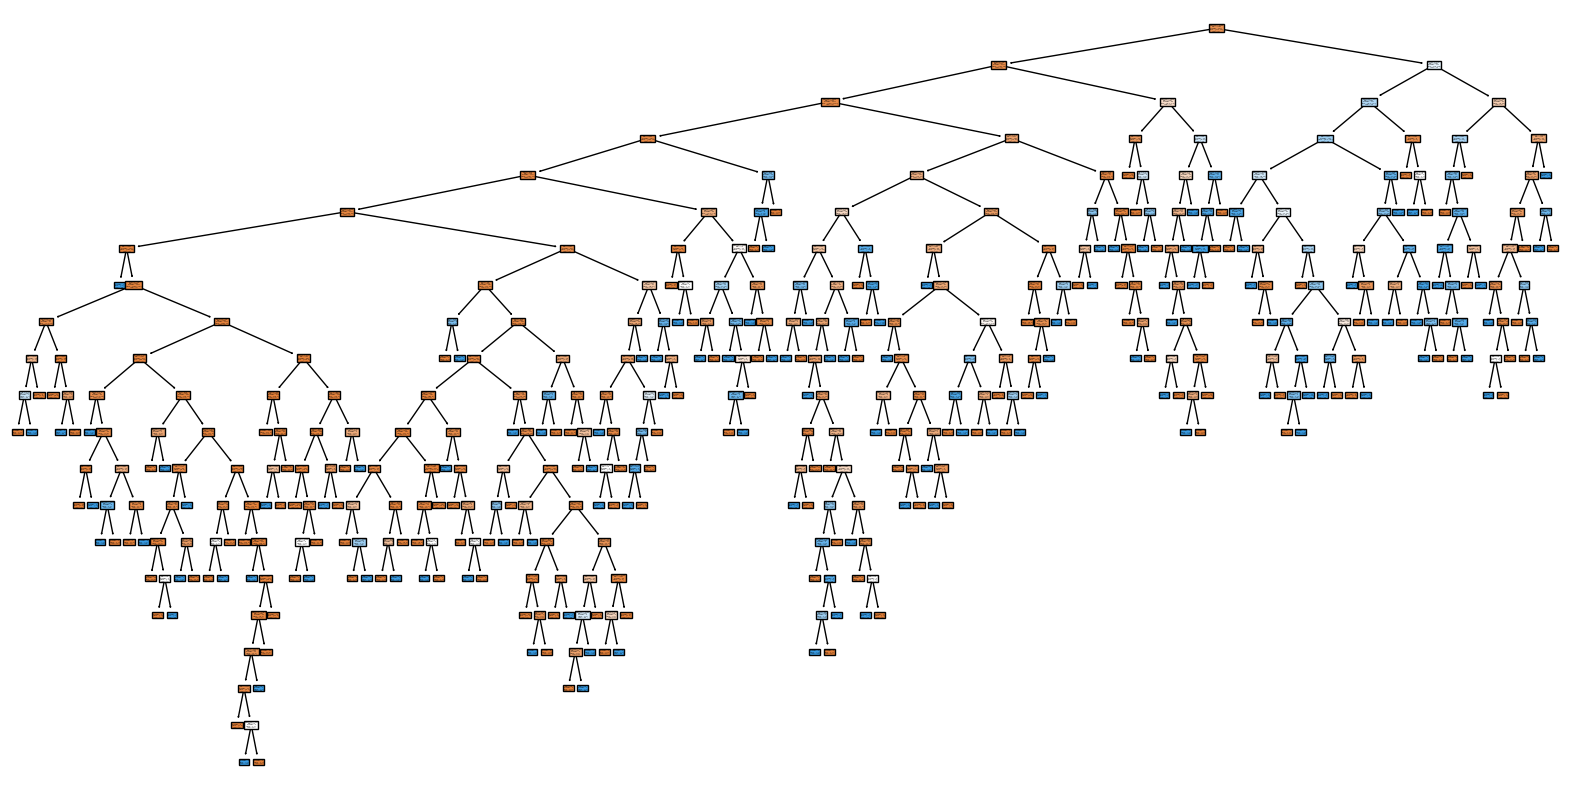

In [50]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(bgc_clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


------